In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

### Illustration of Scripting Layer (pyplot) and Artist Layer objects

In [3]:

x = np.linspace(0, 10, 100)
y = np.sin(x)

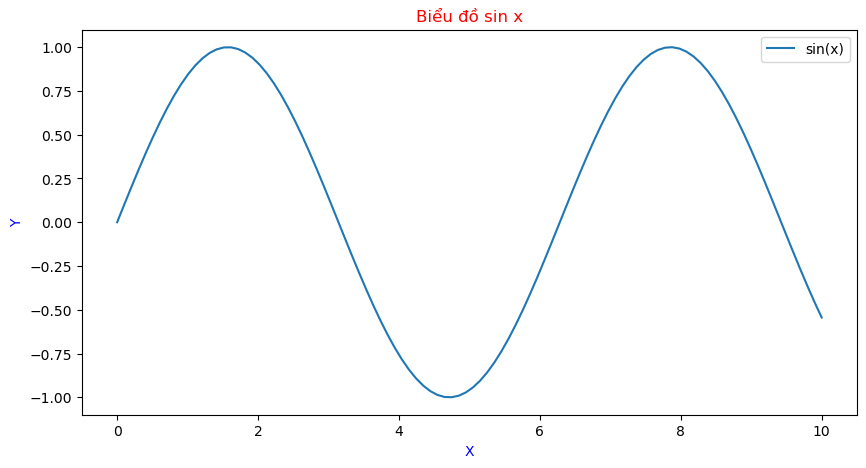

In [4]:
# Scripting Layer
plt.figure(figsize=(10,5))
plt.plot(x,y,label="sin(x)")
plt.title('Biểu đồ sin x',color='red')
plt.xlabel("X",color='blue')
plt.ylabel("Y",color='blue')
plt.legend(loc=1)
plt.show()

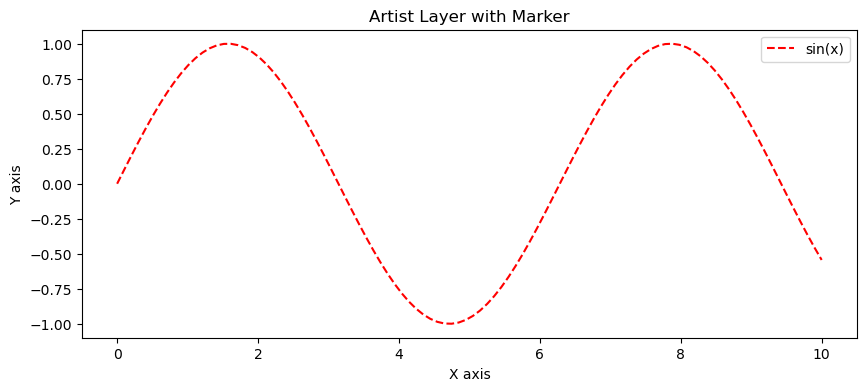

In [5]:
# Artist Layer 
fig, ax = plt.subplots(figsize=(10, 4))  # Tạo Figure và Axes sử dụng OOP
ax.plot(x, y, '--r',  label='sin(x)')  
ax.set_title('Artist Layer with Marker')  # Thay đổi tiêu đề của Axes
ax.set_xlabel('X axis')  # Thay đổi nhãn của trục X
ax.set_ylabel('Y axis')  # Thay đổi nhãn của trục Y
ax.legend()  # Thêm legend
plt.show()

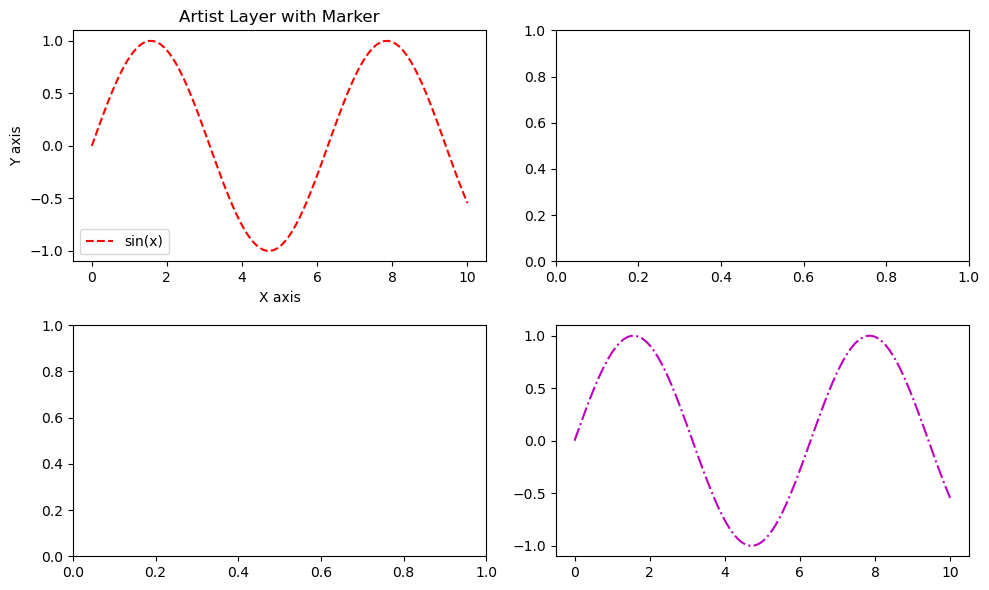

In [6]:
#Artist Layer 
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 6))  # Tạo Figure và Axes sử dụng OOP
ax[0,0].plot(x, y, '--r',  label='sin(x)')  
ax[0,0].set_title('Artist Layer with Marker')  # Thay đổi tiêu đề của Axes
ax[0,0].set_xlabel('X axis')  # Thay đổi nhãn của trục X
ax[0,0].set_ylabel('Y axis')  # Thay đổi nhãn của trục Y
ax[0,0].legend()  # Thêm legend
ax[1,1].plot(x, y, '-.m',  label='sin(x)')
plt.tight_layout()
plt.show()

### Sử dụng Matplotlib để trực quan hóa dữ liệu các biểu đồ thông dụng

#### Read and process Dow Jones Industrial Average (DJIA) stock data

In [13]:
djia = pd.read_csv('djia.csv')
djia.head()

,Date,Open,High,Low,Close
0,10/31/23,33029.11,33070.28,32787.12,33052.87
1,10/30/23,32537.54,33002.97,32537.54,32928.96
2,10/27/23,32782.40,32787.56,32327.20,32417.59
3,10/26/23,33017.17,33105.03,32743.99,32784.30
4,10/25/23,33203.53,33267.91,32989.72,33035.93


In [14]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    209 non-null    object 
 1    Open   209 non-null    float64
 2    High   209 non-null    float64
 3    Low    209 non-null    float64
 4    Close  209 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.3+ KB


- **Date**: The date on which the stock price information is shown.

- **Open**: The price of the DJIA at 9:30 AM ET when the stock market opened.

- **High**: The highest price the DJIA reached during the day.

- **Low**: The lowest price the DJIA reached during the day.

- **Close**: The price of the DJIA when the market closed at 4:00 PM ET.

In [15]:
#Remove spaces in data columns
djia.columns = djia.columns.str.replace(' ', '')
djia.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [16]:
#Change the data type of the Date column and sort the data
djia['Date'] = pd.to_datetime(djia['Date'])
djia.head()

,Date,Open,High,Low,Close
0,2023-10-31,33029.11,33070.28,32787.12,33052.87
1,2023-10-30,32537.54,33002.97,32537.54,32928.96
2,2023-10-27,32782.40,32787.56,32327.20,32417.59
3,2023-10-26,33017.17,33105.03,32743.99,32784.30
4,2023-10-25,33203.53,33267.91,32989.72,33035.93


#### Histogram

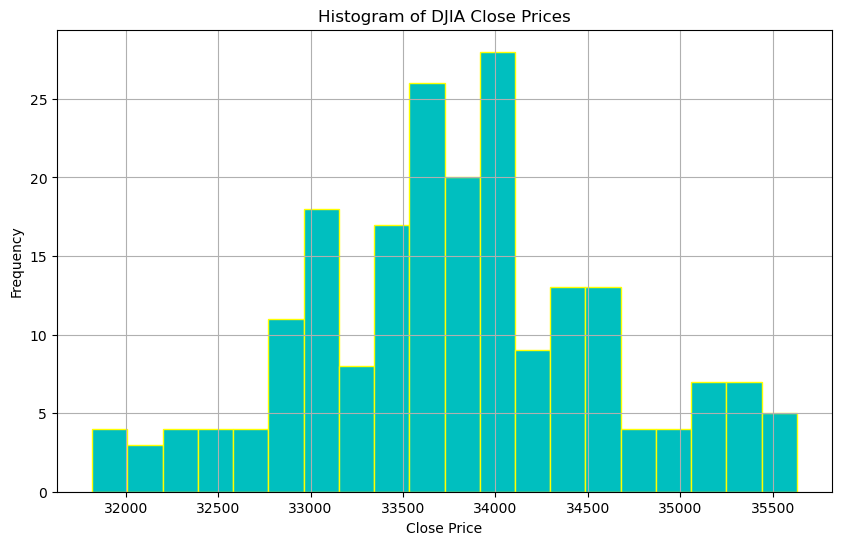

In [17]:
# Draw Histogram on Closing Price - Close
plt.figure(figsize=(10, 6))
#Method 1:
#plt.hist(djia['Close'],bins=20,color='blue',edgecolor='y')
#Method 2:
plt.hist(data=djia, x='Close',bins=20,color='c',edgecolor='yellow')
plt.title('Histogram of DJIA Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Line Plot

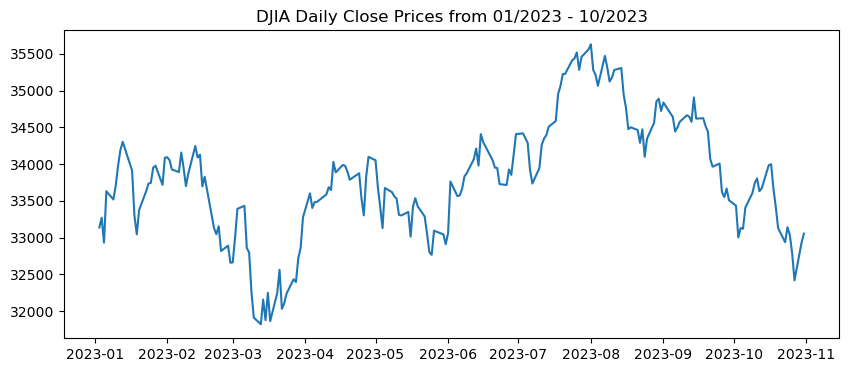

In [18]:
plt.figure(figsize=(10,4))
#Cách 1: 
#plt.plot(djia['Date'], djia['Close'])
# Cách 2
plt.plot('Date','Close',data=djia)
plt.title('DJIA Daily Close Prices from 01/2023 - 10/2023')
plt.show()

##### Format Line plot

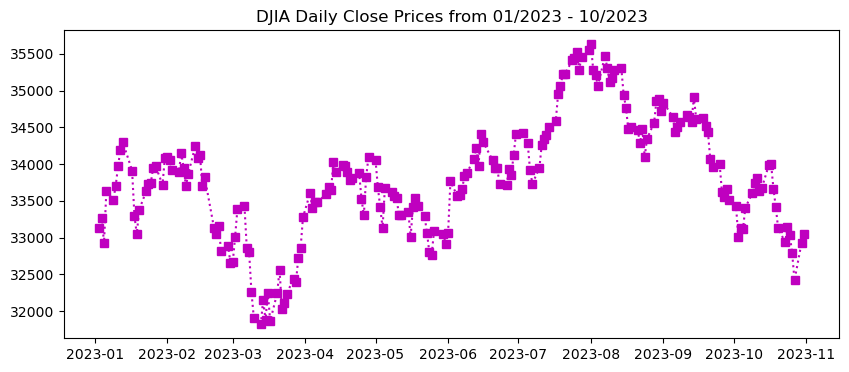

In [19]:
plt.figure(figsize=(10,4))
#Cách 1
# format line: [linestyle color marker]
#plt.plot(djia['Date'], djia['Close'],'g-.D')
plt.plot(djia['Date'], djia['Close'], color='m',marker='s',linestyle='dotted') 
# Cách 2
#plt.plot('Date','Close', 'm',data=djia )
plt.title('DJIA Daily Close Prices from 01/2023 - 10/2023')
plt.show()

##### Line Plots with Multiple Lines

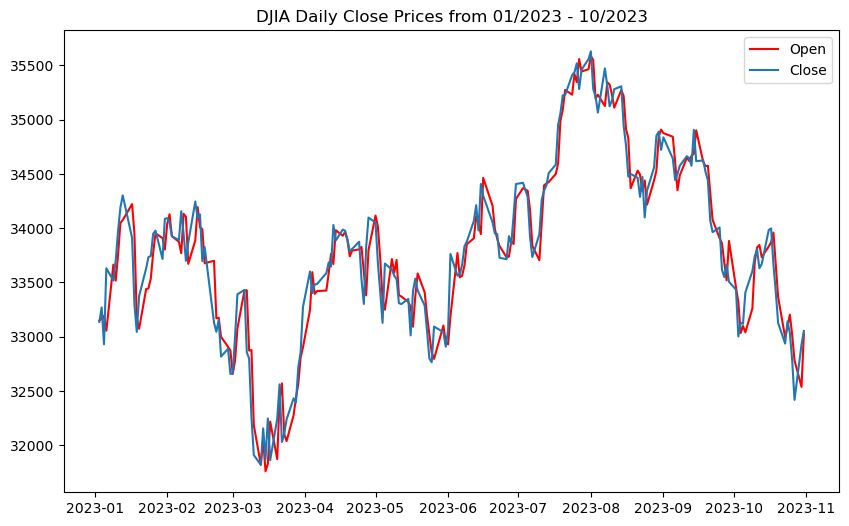

In [20]:
plt.figure(figsize=(10,6))
#Cách 1: 
plt.plot(djia['Date'], djia['Open'], color='r',label='Open')
plt.plot(djia['Date'], djia['Close'], label='Close')
#Cách 2
#plt.plot('Date','Open', label='Open', data=djia)
#plt.plot('Date','Close', label='Close', data=djia)

plt.legend()
plt.title('DJIA Daily Close Prices from 01/2023 - 10/2023')
plt.show()

#### Bar plot

In [21]:
# Tạo cột Month cho biết tên tháng 
djia['Month'] = djia['Date'].dt.month_name()

# Tạo cột Month_num cho biết tháng mấy trong năm
djia['Month_num'] = djia['Date'].dt.month

# Nhóm và tính giá trị trung bình 
djia_monthly_mean = djia.groupby(['Month','Month_num'],as_index=False).mean(numeric_only=True)

djia_monthly_mean.head()

,Month,Month_num,Open,High,Low,Close
0,April,4,33674.288421,33832.691579,33549.615789,33731.280526
1,August,8,34915.545652,35076.850870,34750.499130,34880.656957
2,February,2,33696.416316,33844.902632,33438.562105,33648.256316
3,January,1,33594.735000,33823.690000,33390.498500,33656.000500
4,July,7,34731.967500,34898.006000,34646.135500,34777.200000


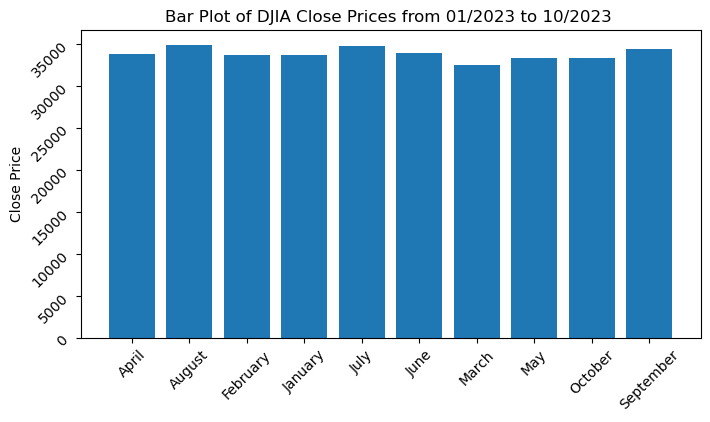

In [22]:
plt.figure(figsize=(8,4))
#Cách 1: 
#plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
#Cách 2: 
plt.bar(data=djia_monthly_mean,x='Month', height = 'Close')

plt.title('Bar Plot of DJIA Close Prices from 01/2023 to 10/2023 ')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
#Lưu ý thứ tự hiển thị các tháng

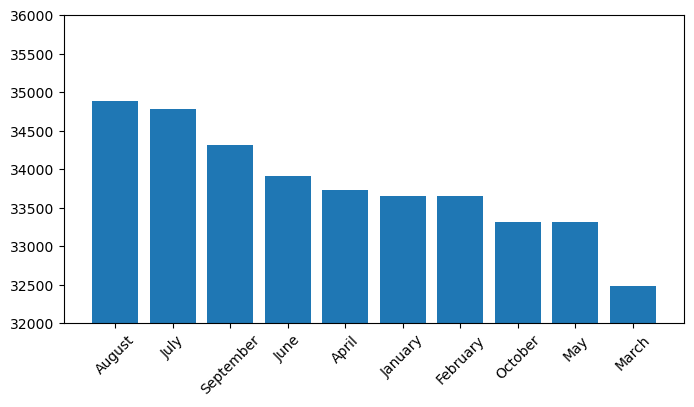

In [23]:
#Sắp thứ tự theo giá Close giảm dần
djia_monthly_mean.sort_values(by = 'Close', ascending = False,inplace=True)

plt.figure(figsize=(8,4))
#Cách 1: 
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
#Cách 2
#plt.bar(data=djia_monthly_mean, x='Month', height = 'Close')
plt.ylim(32000,36000) 

plt.xticks(rotation=45)
plt.show()

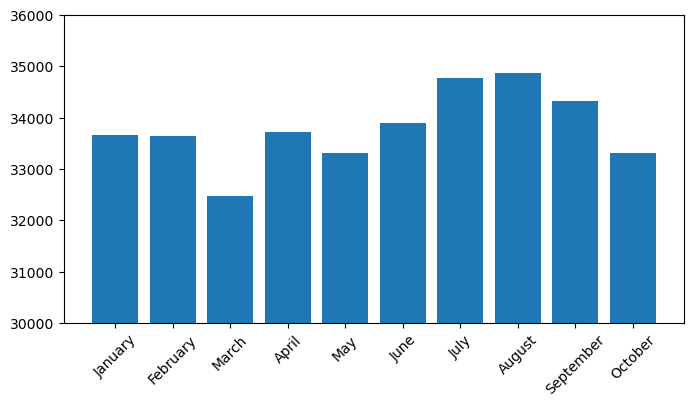

In [24]:
#Sắp thứ tự theo tháng trong năm
djia_monthly_mean.sort_values(by='Month_num',ascending = True,inplace=True)
plt.figure(figsize=(8,4))
plt.ylim(30000,36000) 
#Cách 1:
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
#Cách 2:
#plt.bar(data=djia_monthly_mean,x='Month', height = 'Close')
plt.xticks(rotation=45)
plt.show()

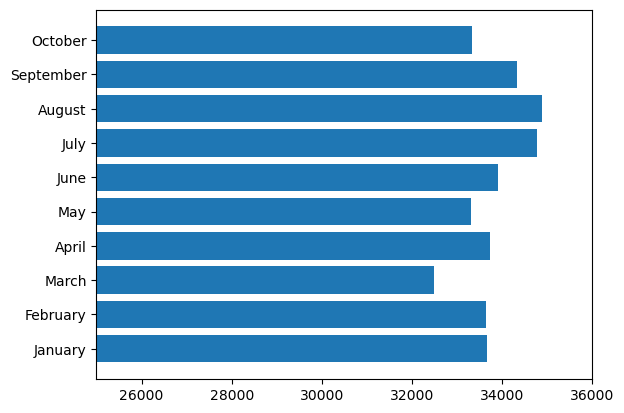

In [25]:
#Cách 1
plt.barh(djia_monthly_mean['Month'], width = djia_monthly_mean['Close'])
#Cách 2
#plt.barh('Month', width = 'Close',data=djia_monthly_mean)
plt.xlim(25000,36000) 
plt.show()

NameError: name 'ghichu' is not defined

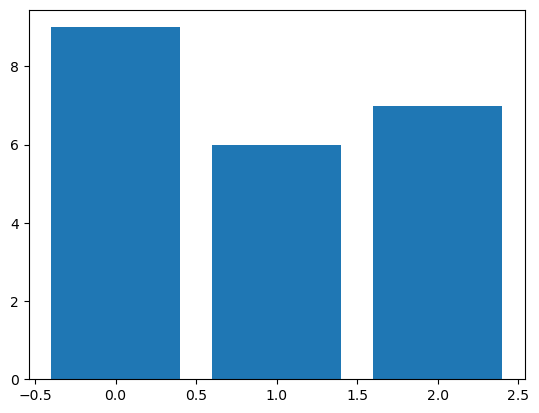

In [27]:
x = np.arange(3) #-> 0,1,2
y = [9,6,7]
bars = plt.bar(x,y)
ghichu(bars)
plt.xticks(x,['an','tuan','binh'])
plt.show()

In [28]:
def ghichu(bars):
    for b in bars:
        plt.annotate(f'cc:{b.get_height()}',
                            xy=(b.get_x() + b.get_width() / 2, b.get_height()),
                            xytext=(0, 4),  # 4 points vertical offset.
                            textcoords='offset points',
                            ha='center', va='bottom')

#### Scatter Plots

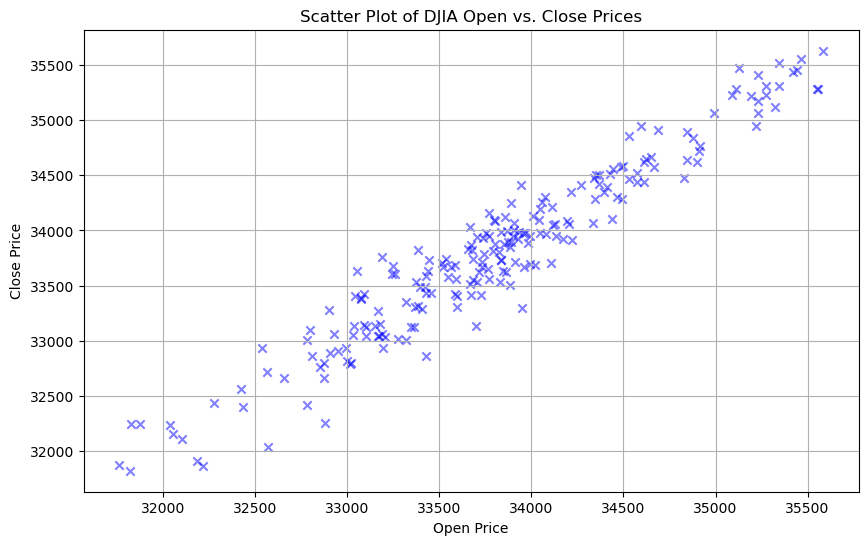

In [29]:
# Scatter plot cho biết mối liên hệ giữa giá 'Open' và 'Close'
plt.figure(figsize=(10, 6))
#Cách 1
#plt.scatter(djia['Open'], djia['Close'],alpha=0.5,color='blue')

#Cách 2
plt.scatter('Open', 'Close',data = djia, alpha=0.5,color='blue',marker='x')

plt.title('Scatter Plot of DJIA Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
